**Підготовка та аналіз даних. Лабораторна робота №6. ФБ-25 Кучеренко Владислав**

Застосування numpy

Мета роботи: отримати поглиблені навички роботи з numpy; дослідити поняття лінійної регресії та
градієнтного спуску.

**Завдання 1:**

**1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random: бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = k + b) для подальшого аналізу результатів.**

In [223]:
import numpy as np
import matplotlib.pyplot as plt


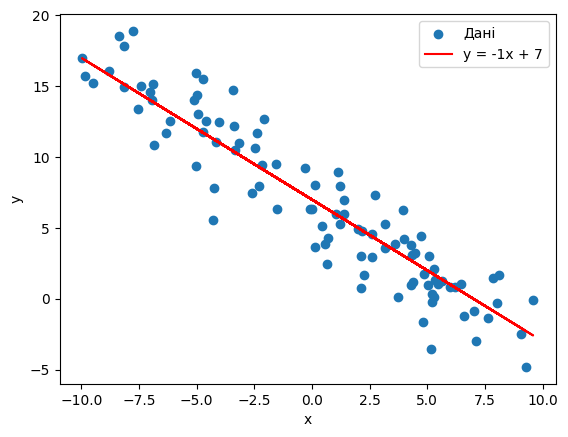

In [224]:
# Визначення параметрів прямої
k = -1  # нахил
b = 7  # зсув

# Генерація випадкових значень для x
num_points = 100  # кількість точок
x = np.random.uniform(-10, 10, num_points)

# Генерація y відповідно до заданої прямої y = kx + b з додаванням випадкового шуму
noise = np.random.normal(0, 2, num_points)  # нормальний розподіл шуму зі стандартним відхиленням 2
y = k * x + b + noise

# Візуалізація результатів
plt.scatter(x, y, label='Дані')
plt.plot(x, k * x + b, color='red', label=f'y = {k}x + {b}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


**2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок середнього k та середнього b.**

**3. Порівняйте знайдені параметри з оцінкою np.polyfit(x, y, 1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).**

In [225]:
def least_squares(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Обчислення чисельника і знаменника для k
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    
    k = numerator / denominator
    
    b = y_mean - k * x_mean
    
    return k, b

k_estimate, b_estimate = least_squares(x, y)

k_polyfit, b_polyfit = np.polyfit(x, y, 1)
 
print(f"Початкове значення k: {k}")
print(f"Початкове значення b: {b}\n")
print(f"Оцінене значення k (least_squares): {k_estimate}")
print(f"Оцінене значення b (least_squares): {b_estimate}\n")
print(f"Оцінене значення k (np.polyfit): {k_polyfit}")
print(f"Оцінене значення b (np.polyfit): {b_polyfit}")

Початкове значення k: -1
Початкове значення b: 7

Оцінене значення k (least_squares): -1.0580496557413026
Оцінене значення b (least_squares): 6.945105287834135

Оцінене значення k (np.polyfit): -1.0580496557413026
Оцінене значення b (np.polyfit): 6.945105287834139


**4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.**

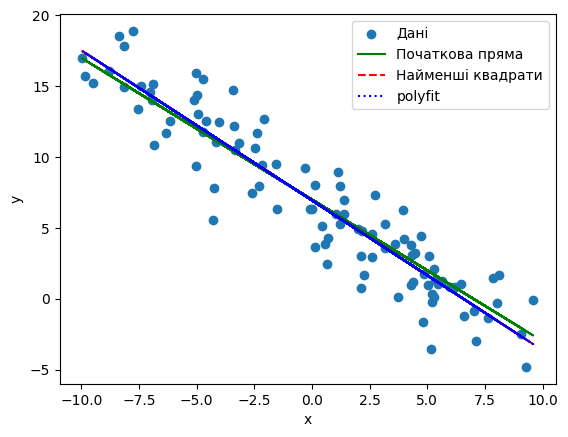

In [226]:
plt.scatter(x, y, label='Дані')
plt.plot(x, k * x + b, color='green', label='Початкова пряма')
plt.plot(x, k_estimate * x + b_estimate, color='red', linestyle='--', label='Найменші квадрати')
plt.plot(x, k_polyfit * x + b_polyfit, color='blue', linestyle=':', label='polyfit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Завдання 2:**

**1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter**

In [227]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000, threshold=1e-6):
    k = 0
    b = 0
    m = len(y)
    prev_error = float('inf')
    loss_values = []
    
    # Градієнтний спуск
    for i in range(n_iter):
        # Обчислення прогнозу y
        y_pred = k * x + b
        
        # Обчислення градієнтів
        dk = (-2/m) * np.sum(x * (y - y_pred))
        db = (-2/m) * np.sum(y - y_pred)
        
        k -= learning_rate * dk
        b -= learning_rate * db
        
        loss = np.mean((y - y_pred) ** 2)
        loss_values.append(loss)
        
        # Друк прогресу кожні 100 ітерацій
        if i % 100 == 0:
            print(f"Iteration {i}: k = {k}, b = {b}, loss = {loss}")

        if abs(prev_error - loss) < threshold:
            print(f'\nЗбіжність досягнута на ітерації: {i}')
            break
        
        prev_error = loss
        
    return k, b, loss_values

k_grad, b_grad, loss_values = gradient_descent(x, y)

# Виведення результатів
print(f"\nПочаткове значення k: {k}")
print(f"Початкове значення b: {b}\n")
print(f"Оцінене значення k (gradient_descent): {k_grad}")
print(f"Оцінене значення b (gradient_descent): {b_grad}")

Iteration 0: k = -0.5347248869235925, b = 0.13352672025595275, loss = 78.89126256204806
Iteration 100: k = -1.0491523036452615, b = 6.036563074538698, loss = 5.092473502635545
Iteration 200: k = -1.0568636873000647, b = 6.824001572833303, loss = 4.250364650426133
Iteration 300: k = -1.057891572625289, b = 6.928962824036216, loss = 4.235402536985755

Збіжність досягнута на ітерації: 360

Початкове значення k: -1
Початкове значення b: 7

Оцінене значення k (gradient_descent): -1.0580024741156013
Оцінене значення b (gradient_descent): 6.940287393905815


**2. Додайте отриману лінію регресії на загальний графік**

**3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки**

Початкове значення k: -1
Початкове значення b: 7

Оцінене значення k (МНК): -1.0580496557413026
Оцінене значення b (МНК): 6.945105287834135

Оцінене значення k (градієнтний спуск): -1.0580024741156013
Оцінене значення b (градієнтний спуск): 6.940287393905815

Оцінене значення k (np.polyfit): -1.0580496557413026
Оцінене значення b (np.polyfit): 6.945105287834139


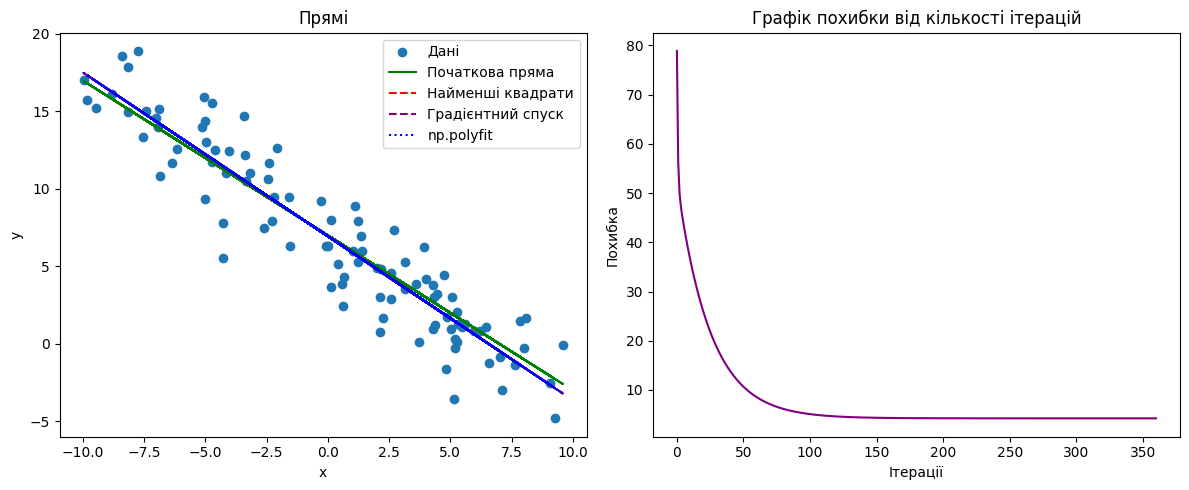

In [228]:
# Виведення результатів
print(f"Початкове значення k: {k}")
print(f"Початкове значення b: {b}\n")
print(f"Оцінене значення k (МНК): {k_estimate}")
print(f"Оцінене значення b (МНК): {b_estimate}\n")
print(f"Оцінене значення k (градієнтний спуск): {k_grad}")
print(f"Оцінене значення b (градієнтний спуск): {b_grad}\n")
print(f"Оцінене значення k (np.polyfit): {k_polyfit}")
print(f"Оцінене значення b (np.polyfit): {b_polyfit}")

# Візуалізація результатів
plt.figure(figsize=(12, 5))

# Графік даних та регресійних ліній
plt.subplot(1, 2, 1)
plt.scatter(x, y, label='Дані')
plt.plot(x, k * x + b, color='green', label='Початкова пряма')
plt.plot(x, k_estimate * x + b_estimate, color='red', linestyle='--', label='Найменші квадрати')
plt.plot(x, k_grad * x + b_grad, color='purple', linestyle='--', label='Градієнтний спуск')
plt.plot(x, k_polyfit * x + b_polyfit, color='blue', linestyle=':', label='np.polyfit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Прямі')

# Графік похибки від кількості ітерацій
plt.subplot(1, 2, 2)
plt.plot(loss_values, color='purple')
plt.xlabel('Ітерації')
plt.ylabel('Похибка')
plt.title('Графік похибки від кількості ітерацій')

plt.tight_layout()
plt.show()